<div style="text-align: center;"><div  style="color:#03bafc; font-size:30px; font-weight:bold; line-height:40px;">Twitter Sentiment Analysis</div></div>
<div style="text-align: center; color:#006666"><strong>Created By: </strong>Parikshit Koya</div>
<div style="text-align: center; color:#006666"><strong>Mail ID: </strong>parikshit.koya@gmail.com</div>
<br>
<div style="text-align: center; color:#006666"><strong>Linkedin: </strong><a href='https://www.linkedin.com/in/parikshitkoya'>https://www.linkedin.com/in/parikshitkoya</a></div>
<div style="text-align: center; color:#006666"><strong>GitHub: </strong><a href='https://github.com/parikshitkoya'>https://github.com/parikshitkoya</a></div>
<div style="text-align: center; color:#006666"><strong>Kaggle: </strong><a href='https://www.kaggle.com/parikshitkoya'>https://www.kaggle.com/parikshitkoya</a></div>


In [1]:
import tweepy
from tweepy import Cursor
import pandas as pd
import json
import openpyxl
from datetime import datetime, timedelta
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import nltk
import sklearn as sk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
amazon = pd.read_excel('amazon_tweets.xlsx', engine= 'openpyxl') 
flipkart = pd.read_excel('flipkart_tweets.xlsx', engine= 'openpyxl') 
snapdeal = pd.read_excel('snapdeal_tweets.xlsx', engine= 'openpyxl') 

In [3]:
amazon['brand'] = 'Amazon'
flipkart['brand'] = 'Flipkart'
snapdeal['brand'] = 'Snapdeal'

In [4]:
frames = [amazon,flipkart,snapdeal]
tweets = pd.concat(frames)
tweets2 = pd.concat(frames)

In [5]:
tweets.brand.value_counts()

Snapdeal    4094
Amazon      4000
Flipkart    3309
Name: brand, dtype: int64

In [6]:
tweets.head()

,Unnamed: 0,tweet_id,text,user,created,user_verified,full_text,brand
0,0,1351150534800117760,@amazonIN @AmazonHelp what's wrong??? After 6 ...,YashDaga,Mon Jan 18 12:52:45 +0000 2021,False,@amazonIN @AmazonHelp what's wrong??? After 6 ...,Amazon
1,1,1351150515703455752,@amazonIN A .3\nB. 2\nC. 1\nD. 4,Chandan19408317,Mon Jan 18 12:52:40 +0000 2021,False,@amazonIN A .3\nB. 2\nC. 1\nD. 4,Amazon
2,2,1351150469343809543,"@amazonIN A) REDMI 9A - 3) Rs. 6,999\nB) Samsu...",MollaNew,Mon Jan 18 12:52:29 +0000 2021,False,"@amazonIN A) REDMI 9A - 3) Rs. 6,999\nB) Samsu...",Amazon
3,3,1351150342893948931,"@amazonIN A. Redmi 9A - 3. Rs 6,999🔥\nB. Samsu...",MadhuChand07,Mon Jan 18 12:51:59 +0000 2021,False,"@amazonIN A. Redmi 9A - 3. Rs 6,999🔥\nB. Samsu...",Amazon
4,4,1351150232634064901,Aura by Samyak Naturals is now Amazon's Choice...,SamyakNaturals,Mon Jan 18 12:51:33 +0000 2021,False,Aura by Samyak Naturals is now Amazon's Choice...,Amazon


In [7]:
tweets = tweets.drop(tweets.columns[0], axis=1)
tweets

,tweet_id,text,user,created,user_verified,full_text,brand
0,1351150534800117760,@amazonIN @AmazonHelp what's wrong??? After 6 ...,YashDaga,Mon Jan 18 12:52:45 +0000 2021,False,@amazonIN @AmazonHelp what's wrong??? After 6 ...,Amazon
1,1351150515703455752,@amazonIN A .3\nB. 2\nC. 1\nD. 4,Chandan19408317,Mon Jan 18 12:52:40 +0000 2021,False,@amazonIN A .3\nB. 2\nC. 1\nD. 4,Amazon
2,1351150469343809543,"@amazonIN A) REDMI 9A - 3) Rs. 6,999\nB) Samsu...",MollaNew,Mon Jan 18 12:52:29 +0000 2021,False,"@amazonIN A) REDMI 9A - 3) Rs. 6,999\nB) Samsu...",Amazon
3,1351150342893948931,"@amazonIN A. Redmi 9A - 3. Rs 6,999🔥\nB. Samsu...",MadhuChand07,Mon Jan 18 12:51:59 +0000 2021,False,"@amazonIN A. Redmi 9A - 3. Rs 6,999🔥\nB. Samsu...",Amazon
4,1351150232634064901,Aura by Samyak Naturals is now Amazon's Choice...,SamyakNaturals,Mon Jan 18 12:51:33 +0000 2021,False,Aura by Samyak Naturals is now Amazon's Choice...,Amazon
...,...,...,...,...,...,...,...
4089,1322228171173892096,Big billion stories 🤷‍♂️\n\nHey @Flipkart Why ...,trendtrader93,Fri Oct 30 17:25:36 +0000 2020,False,Big billion stories 🤷‍♂️\n\nHey @Flipkart Why ...,Snapdeal
4090,1322221761300099072,@UniverseUNLTD @devgandhi1988 @Dilljaley @Megh...,Lucille_Is_Mine,Fri Oct 30 17:00:08 +0000 2020,False,@UniverseUNLTD @devgandhi1988 @Dilljaley @Megh...,Snapdeal
4091,1322214169353990150,@Lucille_Is_Mine @Dilljaley @MeghUpdates @amaz...,devgandhi1988,Fri Oct 30 16:29:58 +0000 2020,False,@Lucille_Is_Mine @Dilljaley @MeghUpdates @amaz...,Snapdeal
4092,1322213873672355841,@devgandhi1988 @Dilljaley @MeghUpdates @amazon...,Lucille_Is_Mine,Fri Oct 30 16:28:47 +0000 2020,False,@devgandhi1988 @Dilljaley @MeghUpdates @amazon...,Snapdeal


In [8]:
tweets.reset_index(drop=True, inplace=True)
tweets.head(5)

,tweet_id,text,user,created,user_verified,full_text,brand
0,1351150534800117760,@amazonIN @AmazonHelp what's wrong??? After 6 ...,YashDaga,Mon Jan 18 12:52:45 +0000 2021,False,@amazonIN @AmazonHelp what's wrong??? After 6 ...,Amazon
1,1351150515703455752,@amazonIN A .3\nB. 2\nC. 1\nD. 4,Chandan19408317,Mon Jan 18 12:52:40 +0000 2021,False,@amazonIN A .3\nB. 2\nC. 1\nD. 4,Amazon
2,1351150469343809543,"@amazonIN A) REDMI 9A - 3) Rs. 6,999\nB) Samsu...",MollaNew,Mon Jan 18 12:52:29 +0000 2021,False,"@amazonIN A) REDMI 9A - 3) Rs. 6,999\nB) Samsu...",Amazon
3,1351150342893948931,"@amazonIN A. Redmi 9A - 3. Rs 6,999🔥\nB. Samsu...",MadhuChand07,Mon Jan 18 12:51:59 +0000 2021,False,"@amazonIN A. Redmi 9A - 3. Rs 6,999🔥\nB. Samsu...",Amazon
4,1351150232634064901,Aura by Samyak Naturals is now Amazon's Choice...,SamyakNaturals,Mon Jan 18 12:51:33 +0000 2021,False,Aura by Samyak Naturals is now Amazon's Choice...,Amazon


In [9]:
tweets[tweets['user_verified'] == True].head(10)

,tweet_id,text,user,created,user_verified,full_text,brand
519,1351112228410421249,Subramanium: CCI has not taken note of the fac...,barandbench,Mon Jan 18 10:20:32 +0000 2021,True,Subramanium: CCI has not taken note of the fac...,Amazon
577,1351109829323087980,.\n@JeffBezos\nHighly offending and provocativ...,VishvasSarang,Mon Jan 18 10:11:00 +0000 2021,True,.\n@JeffBezos\nHighly offending and provocativ...,Amazon
635,1351107061191348224,From One Plus to Redmi to Apple; Amazon offers...,JagranEnglish,Mon Jan 18 10:00:00 +0000 2021,True,From One Plus to Redmi to Apple; Amazon offers...,Amazon
670,1351105322476310529,".@Flipkart, @amazonIN announce Republic Day sa...",News18Tech,Mon Jan 18 09:53:05 +0000 2021,True,".@Flipkart, @amazonIN announce Republic Day sa...",Amazon
721,1351102789464846346,The Bench is now looking into the IAs. \nBench...,barandbench,Mon Jan 18 09:43:01 +0000 2021,True,The Bench is now looking into the IAs. \nBench...,Amazon
747,1351101535397289985,Justice PS Dinesh Kumar begins hearing the mat...,barandbench,Mon Jan 18 09:38:02 +0000 2021,True,Justice PS Dinesh Kumar begins hearing the mat...,Amazon
847,1351097728940601344,. @amazonIN : if you want to do business in In...,SharmaKhemchand,Mon Jan 18 09:22:55 +0000 2021,True,. @amazonIN : if you want to do business in In...,Amazon
858,1351096876951601154,The Karnataka HC will shortly hear two pleas m...,barandbench,Mon Jan 18 09:19:32 +0000 2021,True,The Karnataka HC will shortly hear two pleas m...,Amazon
1236,1351084623997116417,Amazon Gift Vouchers are waiting for you. All ...,amazonIN,Mon Jan 18 08:30:50 +0000 2021,True,Amazon Gift Vouchers are waiting for you. All ...,Amazon
1270,1351081589430759424,.@BJP4India IT cell chief @amitmalviya wrote t...,payalmehta100,Mon Jan 18 08:18:47 +0000 2021,True,.@BJP4India IT cell chief @amitmalviya wrote t...,Amazon


In [10]:
tweets[tweets['user_verified'] == True].tail(10)

,tweet_id,text,user,created,user_verified,full_text,brand
10840,1327147319528202242,.@snapdeal has scripted a successful turnaroun...,forbes_india,Fri Nov 13 07:12:32 +0000 2020,True,.@snapdeal has scripted a successful turnaroun...,Snapdeal
10842,1327144166699139072,.@snapdeal has bounced back from the verge of ...,forbes_india,Fri Nov 13 07:00:01 +0000 2020,True,.@snapdeal has bounced back from the verge of ...,Snapdeal
10872,1326864823892672512,.@snapdeal has bounced back from the verge of ...,forbes_india,Thu Nov 12 12:30:00 +0000 2020,True,.@snapdeal has bounced back from the verge of ...,Snapdeal
10878,1326826554878464000,.@snapdeal has bounced back from the verge of ...,forbes_india,Thu Nov 12 09:57:56 +0000 2020,True,.@snapdeal has bounced back from the verge of ...,Snapdeal
10899,1326528504637267974,"RT @NASSCOM_Product: Kunal Bahl, Co-Founder an...",1kunalbahl,Wed Nov 11 14:13:35 +0000 2020,True,"RT @NASSCOM_Product: Kunal Bahl, Co-Founder an...",Snapdeal
10912,1326473611557838848,"RT @nasscom: ""I believe that the software prod...",1kunalbahl,Wed Nov 11 10:35:28 +0000 2020,True,"RT @nasscom: ""I believe that the software prod...",Snapdeal
10913,1326472851881226240,"RT @nasscom: ""I believe that the software prod...",debjani_ghosh_,Wed Nov 11 10:32:27 +0000 2020,True,"RT @nasscom: ""I believe that the software prod...",Snapdeal
10915,1326470702610837509,"""I believe that the software product startups ...",nasscom,Wed Nov 11 10:23:54 +0000 2020,True,"""I believe that the software product startups ...",Snapdeal
11074,1324603101555257345,@Ritzie___ @snapdeal @Snapdeal_Help @BankofBar...,bankofbaroda,Fri Nov 06 06:42:44 +0000 2020,True,@Ritzie___ @snapdeal @Snapdeal_Help @BankofBar...,Snapdeal
11196,1323551463428280325,".@snapdeal founders, others #invest in #social...",vccircle,Tue Nov 03 09:03:53 +0000 2020,True,".@snapdeal founders, others #invest in #social...",Snapdeal


Tweets from verified accounts are usually either sponsered or Retweets. These are not true consumer sentiments and we can remove these tweets.

In [11]:
print(len(tweets))
tweets.drop(tweets[tweets['user_verified'] == True].index, inplace = True)
tweets.reset_index(drop=True, inplace=True)
print(len(tweets))

11403
11248


In [12]:
tweets.tail(10)

,tweet_id,text,user,created,user_verified,full_text,brand
11238,1322359581595455488,@devgandhi1988 @Dilljaley @MeghUpdates @amazon...,Lucille_Is_Mine,Sat Oct 31 02:07:47 +0000 2020,False,@devgandhi1988 @Dilljaley @MeghUpdates @amazon...,Snapdeal
11239,1322258071981191168,"RT @bankofbaroda: This festive season, shop on...",imshovit,Fri Oct 30 19:24:25 +0000 2020,False,"RT @bankofbaroda: This festive season, shop on...",Snapdeal
11240,1322245972127178752,@snapdeal\n@1kunalbahl \n@rohitkbansal \n Sir ...,Hemansee1,Fri Oct 30 18:36:20 +0000 2020,False,@snapdeal\n@1kunalbahl \n@rohitkbansal \n Sir ...,Snapdeal
11241,1322244610597384193,@snapdeal \n Sir we r duped ...Fraudster did s...,Hemansee1,Fri Oct 30 18:30:55 +0000 2020,False,@snapdeal \n Sir we r duped ...Fraudster did s...,Snapdeal
11242,1322230246599393283,@UniverseUNLTD @Lucille_Is_Mine @Dilljaley @Me...,devgandhi1988,Fri Oct 30 17:33:51 +0000 2020,False,@UniverseUNLTD @Lucille_Is_Mine @Dilljaley @Me...,Snapdeal
11243,1322228171173892096,Big billion stories 🤷‍♂️\n\nHey @Flipkart Why ...,trendtrader93,Fri Oct 30 17:25:36 +0000 2020,False,Big billion stories 🤷‍♂️\n\nHey @Flipkart Why ...,Snapdeal
11244,1322221761300099072,@UniverseUNLTD @devgandhi1988 @Dilljaley @Megh...,Lucille_Is_Mine,Fri Oct 30 17:00:08 +0000 2020,False,@UniverseUNLTD @devgandhi1988 @Dilljaley @Megh...,Snapdeal
11245,1322214169353990150,@Lucille_Is_Mine @Dilljaley @MeghUpdates @amaz...,devgandhi1988,Fri Oct 30 16:29:58 +0000 2020,False,@Lucille_Is_Mine @Dilljaley @MeghUpdates @amaz...,Snapdeal
11246,1322213873672355841,@devgandhi1988 @Dilljaley @MeghUpdates @amazon...,Lucille_Is_Mine,Fri Oct 30 16:28:47 +0000 2020,False,@devgandhi1988 @Dilljaley @MeghUpdates @amazon...,Snapdeal
11247,1322211624044818432,@Lucille_Is_Mine @Dilljaley @MeghUpdates @amaz...,devgandhi1988,Fri Oct 30 16:19:51 +0000 2020,False,@Lucille_Is_Mine @Dilljaley @MeghUpdates @amaz...,Snapdeal


While we have already filtered out the retweets for Amazon and Flipkart while extacting the Tweets from Tweepy, the method used for extracting tweets for snapdeal was slightly different.

We are expecting a lot of retweets in the tweets extracted for Snapdeal. We will delete there retweets.

In [13]:
tweets['is_retweet'] = tweets['full_text'].str.startswith('RT ')
tweets

,tweet_id,text,user,created,user_verified,full_text,brand,is_retweet
0,1351150534800117760,@amazonIN @AmazonHelp what's wrong??? After 6 ...,YashDaga,Mon Jan 18 12:52:45 +0000 2021,False,@amazonIN @AmazonHelp what's wrong??? After 6 ...,Amazon,False
1,1351150515703455752,@amazonIN A .3\nB. 2\nC. 1\nD. 4,Chandan19408317,Mon Jan 18 12:52:40 +0000 2021,False,@amazonIN A .3\nB. 2\nC. 1\nD. 4,Amazon,False
2,1351150469343809543,"@amazonIN A) REDMI 9A - 3) Rs. 6,999\nB) Samsu...",MollaNew,Mon Jan 18 12:52:29 +0000 2021,False,"@amazonIN A) REDMI 9A - 3) Rs. 6,999\nB) Samsu...",Amazon,False
3,1351150342893948931,"@amazonIN A. Redmi 9A - 3. Rs 6,999🔥\nB. Samsu...",MadhuChand07,Mon Jan 18 12:51:59 +0000 2021,False,"@amazonIN A. Redmi 9A - 3. Rs 6,999🔥\nB. Samsu...",Amazon,False
4,1351150232634064901,Aura by Samyak Naturals is now Amazon's Choice...,SamyakNaturals,Mon Jan 18 12:51:33 +0000 2021,False,Aura by Samyak Naturals is now Amazon's Choice...,Amazon,False
...,...,...,...,...,...,...,...,...
11243,1322228171173892096,Big billion stories 🤷‍♂️\n\nHey @Flipkart Why ...,trendtrader93,Fri Oct 30 17:25:36 +0000 2020,False,Big billion stories 🤷‍♂️\n\nHey @Flipkart Why ...,Snapdeal,False
11244,1322221761300099072,@UniverseUNLTD @devgandhi1988 @Dilljaley @Megh...,Lucille_Is_Mine,Fri Oct 30 17:00:08 +0000 2020,False,@UniverseUNLTD @devgandhi1988 @Dilljaley @Megh...,Snapdeal,False
11245,1322214169353990150,@Lucille_Is_Mine @Dilljaley @MeghUpdates @amaz...,devgandhi1988,Fri Oct 30 16:29:58 +0000 2020,False,@Lucille_Is_Mine @Dilljaley @MeghUpdates @amaz...,Snapdeal,False
11246,1322213873672355841,@devgandhi1988 @Dilljaley @MeghUpdates @amazon...,Lucille_Is_Mine,Fri Oct 30 16:28:47 +0000 2020,False,@devgandhi1988 @Dilljaley @MeghUpdates @amazon...,Snapdeal,False


In [14]:
tweets[tweets['is_retweet'] == True]['brand'].value_counts()

Snapdeal    924
Name: brand, dtype: int64

### Removing retweets
As we can see that out of approx 4000 (after removing tweets from verified users) tweets we have for Snapdeal, 924 of these are [retweets](https://help.twitter.com/en/using-twitter/retweet-faqs#:~:text=A%20Retweet%20is%20a%20re,re%2Dposting%20someone%20else's%20content.).
<br>
We will drop these retweets as well.

In [15]:
print(len(tweets))
tweets.drop(tweets[tweets['is_retweet'] == True].index, inplace = True)
tweets.reset_index(drop=True, inplace=True)
print(len(tweets))

11248
10324


In [16]:
tweets

,tweet_id,text,user,created,user_verified,full_text,brand,is_retweet
0,1351150534800117760,@amazonIN @AmazonHelp what's wrong??? After 6 ...,YashDaga,Mon Jan 18 12:52:45 +0000 2021,False,@amazonIN @AmazonHelp what's wrong??? After 6 ...,Amazon,False
1,1351150515703455752,@amazonIN A .3\nB. 2\nC. 1\nD. 4,Chandan19408317,Mon Jan 18 12:52:40 +0000 2021,False,@amazonIN A .3\nB. 2\nC. 1\nD. 4,Amazon,False
2,1351150469343809543,"@amazonIN A) REDMI 9A - 3) Rs. 6,999\nB) Samsu...",MollaNew,Mon Jan 18 12:52:29 +0000 2021,False,"@amazonIN A) REDMI 9A - 3) Rs. 6,999\nB) Samsu...",Amazon,False
3,1351150342893948931,"@amazonIN A. Redmi 9A - 3. Rs 6,999🔥\nB. Samsu...",MadhuChand07,Mon Jan 18 12:51:59 +0000 2021,False,"@amazonIN A. Redmi 9A - 3. Rs 6,999🔥\nB. Samsu...",Amazon,False
4,1351150232634064901,Aura by Samyak Naturals is now Amazon's Choice...,SamyakNaturals,Mon Jan 18 12:51:33 +0000 2021,False,Aura by Samyak Naturals is now Amazon's Choice...,Amazon,False
...,...,...,...,...,...,...,...,...
10319,1322228171173892096,Big billion stories 🤷‍♂️\n\nHey @Flipkart Why ...,trendtrader93,Fri Oct 30 17:25:36 +0000 2020,False,Big billion stories 🤷‍♂️\n\nHey @Flipkart Why ...,Snapdeal,False
10320,1322221761300099072,@UniverseUNLTD @devgandhi1988 @Dilljaley @Megh...,Lucille_Is_Mine,Fri Oct 30 17:00:08 +0000 2020,False,@UniverseUNLTD @devgandhi1988 @Dilljaley @Megh...,Snapdeal,False
10321,1322214169353990150,@Lucille_Is_Mine @Dilljaley @MeghUpdates @amaz...,devgandhi1988,Fri Oct 30 16:29:58 +0000 2020,False,@Lucille_Is_Mine @Dilljaley @MeghUpdates @amaz...,Snapdeal,False
10322,1322213873672355841,@devgandhi1988 @Dilljaley @MeghUpdates @amazon...,Lucille_Is_Mine,Fri Oct 30 16:28:47 +0000 2020,False,@devgandhi1988 @Dilljaley @MeghUpdates @amazon...,Snapdeal,False


In [17]:
hashtags = []
for i in range(len(tweets)):
    if '#' in tweets['full_text'].iloc[i]:
        hashtags.append(re.findall(r"#(\w+)", tweets['full_text'].iloc[i]))
    else:
        hashtags.append(np.nan)

In [18]:
tweets['hashtags'] = hashtags

In [19]:
mentions = []
for i in range(len(tweets)):
    if '@' in tweets['full_text'].iloc[i]:
        mentions.append(re.findall(r"@(\w+)", tweets['full_text'].iloc[i]))
    else:
        mentions.append(np.nan)
tweets['mentions'] = mentions

In [20]:
tweets.head()

,tweet_id,text,user,created,user_verified,full_text,brand,is_retweet,hashtags,mentions
0,1351150534800117760,@amazonIN @AmazonHelp what's wrong??? After 6 ...,YashDaga,Mon Jan 18 12:52:45 +0000 2021,False,@amazonIN @AmazonHelp what's wrong??? After 6 ...,Amazon,False,NaN,"[amazonIN, AmazonHelp]"
1,1351150515703455752,@amazonIN A .3\nB. 2\nC. 1\nD. 4,Chandan19408317,Mon Jan 18 12:52:40 +0000 2021,False,@amazonIN A .3\nB. 2\nC. 1\nD. 4,Amazon,False,NaN,[amazonIN]
2,1351150469343809543,"@amazonIN A) REDMI 9A - 3) Rs. 6,999\nB) Samsu...",MollaNew,Mon Jan 18 12:52:29 +0000 2021,False,"@amazonIN A) REDMI 9A - 3) Rs. 6,999\nB) Samsu...",Amazon,False,"[AmazonGreatRepublicDaySale, NewBeginningsBigS...","[amazonIN, amazonIN, wasimMufti3, AlexNoorMdKh..."
3,1351150342893948931,"@amazonIN A. Redmi 9A - 3. Rs 6,999🔥\nB. Samsu...",MadhuChand07,Mon Jan 18 12:51:59 +0000 2021,False,"@amazonIN A. Redmi 9A - 3. Rs 6,999🔥\nB. Samsu...",Amazon,False,"[AmazonGreatRepublicDaySale, NewBeginningsBigS...","[amazonIN, amazonIN]"
4,1351150232634064901,Aura by Samyak Naturals is now Amazon's Choice...,SamyakNaturals,Mon Jan 18 12:51:33 +0000 2021,False,Aura by Samyak Naturals is now Amazon's Choice...,Amazon,False,[AmazonPrime],[amazonIN]


In [21]:
def cleantext(text):

    text = text.replace('\n', ' ') #Remove linebreaks
    text = re.sub(r'@([A-Za-z0-9_]+)', '', text) #Remove @Handles
    text = re.sub(r'#([A-Za-z0-9_]+)', '', text) #Remove the #Hastags
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove URLs
    text = re.sub(r'[0-9]+', '', text) #Remove numberic characters    
    text = ''.join(word.strip(string.punctuation) for word in text) #Remove punctuation
    text = ' '.join([word.lower() for word in text.split()])
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f" 
                               u"\u3030"
                               "]+", flags=re.UNICODE) 
    return emoji_pattern.sub(r'', text) #Remove Emojis
    text = re.sub('\s+', ' ', text) #Remove more than duplicate Whitespaces
    text = text.strip() #Remove leading and trailing Whitespaces

    return text

In [22]:
tweets['clean_text'] = tweets['full_text'].apply(cleantext)
tweets.head()

,tweet_id,text,user,created,user_verified,full_text,brand,is_retweet,hashtags,mentions,clean_text
0,1351150534800117760,@amazonIN @AmazonHelp what's wrong??? After 6 ...,YashDaga,Mon Jan 18 12:52:45 +0000 2021,False,@amazonIN @AmazonHelp what's wrong??? After 6 ...,Amazon,False,NaN,"[amazonIN, AmazonHelp]",whats wrong after pickups being scheduled stil...
1,1351150515703455752,@amazonIN A .3\nB. 2\nC. 1\nD. 4,Chandan19408317,Mon Jan 18 12:52:40 +0000 2021,False,@amazonIN A .3\nB. 2\nC. 1\nD. 4,Amazon,False,NaN,[amazonIN],a b c d
2,1351150469343809543,"@amazonIN A) REDMI 9A - 3) Rs. 6,999\nB) Samsu...",MollaNew,Mon Jan 18 12:52:29 +0000 2021,False,"@amazonIN A) REDMI 9A - 3) Rs. 6,999\nB) Samsu...",Amazon,False,"[AmazonGreatRepublicDaySale, NewBeginningsBigS...","[amazonIN, amazonIN, wasimMufti3, AlexNoorMdKh...",a redmi a rs b samsung galaxy m rs c redmi not...
3,1351150342893948931,"@amazonIN A. Redmi 9A - 3. Rs 6,999🔥\nB. Samsu...",MadhuChand07,Mon Jan 18 12:51:59 +0000 2021,False,"@amazonIN A. Redmi 9A - 3. Rs 6,999🔥\nB. Samsu...",Amazon,False,"[AmazonGreatRepublicDaySale, NewBeginningsBigS...","[amazonIN, amazonIN]",a redmi a rs b samsung galaxy m rs c redmi n...
4,1351150232634064901,Aura by Samyak Naturals is now Amazon's Choice...,SamyakNaturals,Mon Jan 18 12:51:33 +0000 2021,False,Aura by Samyak Naturals is now Amazon's Choice...,Amazon,False,[AmazonPrime],[amazonIN],aura by samyak naturals is now amazons choice ...


In [23]:
print(tweets['full_text'][3])
print('---------------------------------------------------------------------------------------------------------')
print('')
print('---------------------------------------------------------------------------------------------------------')
print(tweets['clean_text'][3])

@amazonIN A. Redmi 9A - 3. Rs 6,999🔥
B. Samsung Galaxy M51 - 2. Rs 22,999🔥
C. Redmi Note 9 - 4. Rs 11,999🔥
D. Samsung Galaxy M31s - 1. Rs 17,999🔥

Wish to win this one 🤩🧡🤍💚

#AmazonGreatRepublicDaySale
#NewBeginningsBigSavings
@amazonIN
---------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------
a redmi a rs  b samsung galaxy m rs  c redmi note rs  d samsung galaxy ms rs  wish to win this one 


As we can see that there cases where after cleanup, full_text column is now blank. This is not a nan value but a string with no characters in it.
<br>
<br>
We will start by dropping some columns which are not required.

Since the cells in full_text with no values are still being considered a string as opposed to nan. We will have to create an identifier for these.

### Removing Stopwords

In [24]:
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
clean_text_wo_stop = []
for i in range(len(tweets)):
    text = word_tokenize(tweets['clean_text'].iloc[i])
    filtered_sentence = ' '.join([word for word in text if not word in stop_words])
    clean_text_wo_stop.append(filtered_sentence)
clean_text_wo_stop[0:5]

['whats wrong pickups scheduled still one come pick invoice number inysoc invoice details apysoc please help pathetic service amazon disappointed',
 'b c',
 'redmi rs b samsung galaxy rs c redmi note rs samsung galaxy rs',
 'redmi rs b samsung galaxy rs c redmi note rs samsung galaxy ms rs wish win one',
 'aura samyak naturals amazons choice product solid perfume thank good response also available orders one day delivery get']

In [26]:
tweets['clean_text'] = clean_text_wo_stop
tweets.head()

,tweet_id,text,user,created,user_verified,full_text,brand,is_retweet,hashtags,mentions,clean_text
0,1351150534800117760,@amazonIN @AmazonHelp what's wrong??? After 6 ...,YashDaga,Mon Jan 18 12:52:45 +0000 2021,False,@amazonIN @AmazonHelp what's wrong??? After 6 ...,Amazon,False,NaN,"[amazonIN, AmazonHelp]",whats wrong pickups scheduled still one come p...
1,1351150515703455752,@amazonIN A .3\nB. 2\nC. 1\nD. 4,Chandan19408317,Mon Jan 18 12:52:40 +0000 2021,False,@amazonIN A .3\nB. 2\nC. 1\nD. 4,Amazon,False,NaN,[amazonIN],b c
2,1351150469343809543,"@amazonIN A) REDMI 9A - 3) Rs. 6,999\nB) Samsu...",MollaNew,Mon Jan 18 12:52:29 +0000 2021,False,"@amazonIN A) REDMI 9A - 3) Rs. 6,999\nB) Samsu...",Amazon,False,"[AmazonGreatRepublicDaySale, NewBeginningsBigS...","[amazonIN, amazonIN, wasimMufti3, AlexNoorMdKh...",redmi rs b samsung galaxy rs c redmi note rs s...
3,1351150342893948931,"@amazonIN A. Redmi 9A - 3. Rs 6,999🔥\nB. Samsu...",MadhuChand07,Mon Jan 18 12:51:59 +0000 2021,False,"@amazonIN A. Redmi 9A - 3. Rs 6,999🔥\nB. Samsu...",Amazon,False,"[AmazonGreatRepublicDaySale, NewBeginningsBigS...","[amazonIN, amazonIN]",redmi rs b samsung galaxy rs c redmi note rs s...
4,1351150232634064901,Aura by Samyak Naturals is now Amazon's Choice...,SamyakNaturals,Mon Jan 18 12:51:33 +0000 2021,False,Aura by Samyak Naturals is now Amazon's Choice...,Amazon,False,[AmazonPrime],[amazonIN],aura samyak naturals amazons choice product so...


In [27]:
blank_text_check = []
for i in range(len(tweets)):
    blank_text_check.append(" ".join(tweets['clean_text'].iloc[i].split()))
tweets['blank_text_check'] = blank_text_check

In [28]:
is_blank = (tweets['blank_text_check'] =='')
tweets['is_blank'] = is_blank

In [29]:
tweets[tweets['is_blank'] == True]

,tweet_id,text,user,created,user_verified,full_text,brand,is_retweet,hashtags,mentions,clean_text,blank_text_check,is_blank
1186,1351085957785784322,@amazonIN Here it is\n#AmazonGreatRepublicDayS...,AproposHeist,Mon Jan 18 08:36:08 +0000 2021,False,@amazonIN Here it is\n#AmazonGreatRepublicDayS...,Amazon,False,"[AmazonGreatRepublicDaySale, NewBeginningsBigS...","[amazonIN, amazonIN]",,,True
1773,1351020700799283201,@KapilMishra_IND @amazonIN @rathi_yukti He sho...,Nripendra_31,Mon Jan 18 04:16:50 +0000 2021,False,@KapilMishra_IND @amazonIN @rathi_yukti He sho...,Amazon,False,NaN,"[KapilMishra_IND, amazonIN, rathi_yukti]",,,True
1975,1350987341696008192,Will do @amazonIN . https://t.co/YZsh1y82nh,Indianhaspride,Mon Jan 18 02:04:17 +0000 2021,False,Will do @amazonIN . https://t.co/YZsh1y82nh,Amazon,False,NaN,[amazonIN],,,True
3569,1350788636812271619,@amazonIN \n#AmazonPrime \n#AmazonPrimeMembers...,RAJA_PATRA_O,Sun Jan 17 12:54:42 +0000 2021,False,@amazonIN \n#AmazonPrime \n#AmazonPrimeMembers...,Amazon,False,"[AmazonPrime, AmazonPrimeMembership]",[amazonIN],,,True
4313,1350888175296675841,@Akasharya_1 @Micromax__India @Flipkart *2 more,Priyans73770836,Sun Jan 17 19:30:13 +0000 2021,False,@Akasharya_1 @Micromax__India @Flipkart *2 more,Flipkart,False,NaN,"[Akasharya_1, Micromax__India, Flipkart]",,,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10264,1322829906850578432,@7ru7h_1 @amazonIN @Flipkart @myntra @snapdeal...,ranubhogi,Sun Nov 01 09:16:41 +0000 2020,False,@7ru7h_1 @amazonIN @Flipkart @myntra @snapdeal...,Snapdeal,False,NaN,"[7ru7h_1, amazonIN, Flipkart, myntra, snapdeal...",,,True
10288,1322602009317371904,@snapdeal @rblbank @PMOIndia @FinMinIndia http...,bh_devilal,Sat Oct 31 18:11:06 +0000 2020,False,@snapdeal @rblbank @PMOIndia @FinMinIndia http...,Snapdeal,False,NaN,"[snapdeal, rblbank, PMOIndia, FinMinIndia]",,,True
10295,1322522673654607875,@flipkartsupport @_Kalyan_K @amazon @snapdeal ...,RakeshR35024223,Sat Oct 31 12:55:51 +0000 2020,False,@flipkartsupport @_Kalyan_K @amazon @snapdeal ...,Snapdeal,False,NaN,"[flipkartsupport, _Kalyan_K, amazon, snapdeal,...",,,True
10297,1322508626641051653,@jagograhakjago @snapdeal @Flipkart @TimesNow ...,smartsonzy,Sat Oct 31 12:00:02 +0000 2020,False,@jagograhakjago @snapdeal @Flipkart @TimesNow ...,Snapdeal,False,NaN,"[jagograhakjago, snapdeal, Flipkart, TimesNow,...",,,True


In [30]:
tweets[tweets['is_blank'] == True]['brand'].value_counts()

Snapdeal    123
Flipkart      7
Amazon        4
Name: brand, dtype: int64

In [31]:
print(len(tweets))
tweets.drop(tweets[tweets['is_blank'] == True].index, inplace = True)
tweets.reset_index(drop=True, inplace=True)
print(len(tweets))

10324
10190


In [32]:
tweets = tweets.drop(tweets[['is_blank','blank_text_check']], axis=1)
tweets

,tweet_id,text,user,created,user_verified,full_text,brand,is_retweet,hashtags,mentions,clean_text
0,1351150534800117760,@amazonIN @AmazonHelp what's wrong??? After 6 ...,YashDaga,Mon Jan 18 12:52:45 +0000 2021,False,@amazonIN @AmazonHelp what's wrong??? After 6 ...,Amazon,False,NaN,"[amazonIN, AmazonHelp]",whats wrong pickups scheduled still one come p...
1,1351150515703455752,@amazonIN A .3\nB. 2\nC. 1\nD. 4,Chandan19408317,Mon Jan 18 12:52:40 +0000 2021,False,@amazonIN A .3\nB. 2\nC. 1\nD. 4,Amazon,False,NaN,[amazonIN],b c
2,1351150469343809543,"@amazonIN A) REDMI 9A - 3) Rs. 6,999\nB) Samsu...",MollaNew,Mon Jan 18 12:52:29 +0000 2021,False,"@amazonIN A) REDMI 9A - 3) Rs. 6,999\nB) Samsu...",Amazon,False,"[AmazonGreatRepublicDaySale, NewBeginningsBigS...","[amazonIN, amazonIN, wasimMufti3, AlexNoorMdKh...",redmi rs b samsung galaxy rs c redmi note rs s...
3,1351150342893948931,"@amazonIN A. Redmi 9A - 3. Rs 6,999🔥\nB. Samsu...",MadhuChand07,Mon Jan 18 12:51:59 +0000 2021,False,"@amazonIN A. Redmi 9A - 3. Rs 6,999🔥\nB. Samsu...",Amazon,False,"[AmazonGreatRepublicDaySale, NewBeginningsBigS...","[amazonIN, amazonIN]",redmi rs b samsung galaxy rs c redmi note rs s...
4,1351150232634064901,Aura by Samyak Naturals is now Amazon's Choice...,SamyakNaturals,Mon Jan 18 12:51:33 +0000 2021,False,Aura by Samyak Naturals is now Amazon's Choice...,Amazon,False,[AmazonPrime],[amazonIN],aura samyak naturals amazons choice product so...
...,...,...,...,...,...,...,...,...,...,...,...
10185,1322228171173892096,Big billion stories 🤷‍♂️\n\nHey @Flipkart Why ...,trendtrader93,Fri Oct 30 17:25:36 +0000 2020,False,Big billion stories 🤷‍♂️\n\nHey @Flipkart Why ...,Snapdeal,False,NaN,"[Flipkart, amazonIN, snapdeal]",big billion stories hey display items delivere...
10186,1322221761300099072,@UniverseUNLTD @devgandhi1988 @Dilljaley @Megh...,Lucille_Is_Mine,Fri Oct 30 17:00:08 +0000 2020,False,@UniverseUNLTD @devgandhi1988 @Dilljaley @Megh...,Snapdeal,False,NaN,"[UniverseUNLTD, devgandhi1988, Dilljaley, Megh...",cs
10187,1322214169353990150,@Lucille_Is_Mine @Dilljaley @MeghUpdates @amaz...,devgandhi1988,Fri Oct 30 16:29:58 +0000 2020,False,@Lucille_Is_Mine @Dilljaley @MeghUpdates @amaz...,Snapdeal,False,NaN,"[Lucille_Is_Mine, Dilljaley, MeghUpdates, amaz...",yes first look
10188,1322213873672355841,@devgandhi1988 @Dilljaley @MeghUpdates @amazon...,Lucille_Is_Mine,Fri Oct 30 16:28:47 +0000 2020,False,@devgandhi1988 @Dilljaley @MeghUpdates @amazon...,Snapdeal,False,NaN,"[devgandhi1988, Dilljaley, MeghUpdates, amazon...",thats problem pragmatism missing todays world


In [33]:
# sorting by user, full_text, created
tweets.sort_values(['user', 'full_text', 'created'], inplace = True)
tweets

,tweet_id,text,user,created,user_verified,full_text,brand,is_retweet,hashtags,mentions,clean_text
3848,1350777972303687680,@amazonIN 1️⃣9️⃣th January 2021\n\n#AmazonPrim...,007Preeti_,Sun Jan 17 12:12:19 +0000 2021,False,@amazonIN 1️⃣9️⃣th January 2021\n\n#AmazonPrim...,Amazon,False,[AmazonPrimeMembership],"[amazonIN, amazonIN, Tank_Hardik_84, silku5, k...",⃣⃣th january
9981,1325000081595011072,@amazonINNo # 406-6207840-4325949 Order Is Bei...,007jshsndp,Sat Nov 07 09:00:11 +0000 2020,False,@amazonINNo # 406-6207840-4325949 Order Is Bei...,Snapdeal,False,[],"[amazonINNo, Flipkart, snapdeal, amazonIN, Ama...",order late day since order srvice u prviding t...
9979,1325008842170626049,@amazonINNo Order Is Being Late Its 16 Day Sin...,007jshsndp,Sat Nov 07 09:35:00 +0000 2020,False,@amazonINNo Order Is Being Late Its 16 Day Sin...,Snapdeal,False,NaN,"[amazonINNo, Flipkart, snapdeal, amazonIN, Ama...",order late day since order srvice u prviding t...
9980,1325008793739042816,@amazonINNo Order Is Being Late Its 16 Day Sin...,007jshsndp,Sat Nov 07 09:34:48 +0000 2020,False,@amazonINNo Order Is Being Late Its 16 Day Sin...,Snapdeal,False,NaN,"[amazonINNo, Flipkart, snapdeal, amazonIN, Ama...",order late day since order srvice u prviding t...
9983,1324995811550244864,Order From @amazonIN No # 406-6207840-4325949...,007jshsndp,Sat Nov 07 08:43:13 +0000 2020,False,Order From @amazonIN No # 406-6207840-4325949...,Snapdeal,False,[],"[amazonIN, Flipkart, snapdeal]",order order late th day since order service u ...
...,...,...,...,...,...,...,...,...,...,...,...
8894,1340196947810893824,@ShikhaaDhariwal @Rajput_Ramesh @snapdeal Scam?,zen4freedom,Sat Dec 19 07:27:06 +0000 2020,False,@ShikhaaDhariwal @Rajput_Ramesh @snapdeal Scam?,Snapdeal,False,NaN,"[ShikhaaDhariwal, Rajput_Ramesh, snapdeal]",scam
10077,1323524218877698048,#buylocal #vocalforlocal\nBe Stylish...Be You....,zidoclothing,Tue Nov 03 07:15:38 +0000 2020,False,#buylocal #vocalforlocal\nBe Stylish...Be You....,Snapdeal,False,"[buylocal, vocalforlocal, fashion, tshirt, Sal...","[amazon, flipkart, myntra, limeroad, 2gud, pay...",stylishbe byu zido tshirts men trade enquiries...
9190,1336192239261736962,#vocalforlocal #buylocal\nBe Stylish... Be You...,zidoclothing,Tue Dec 08 06:13:49 +0000 2020,False,#vocalforlocal #buylocal\nBe Stylish... Be You...,Snapdeal,False,"[vocalforlocal, buylocal, fashion, tshirt, buy...","[amazon, flipkart, myntra, limeroad, paytm, sn...",stylish must tee trade enquiries also available
2046,1350906351380168704,#AmazonQuiz\n#Pictionary|FunzoneCarnival \n@am...,zubeer_ahmed17,Sun Jan 17 20:42:27 +0000 2021,False,#AmazonQuiz\n#Pictionary|FunzoneCarnival \n@am...,Amazon,False,"[AmazonQuiz, Pictionary]","[amazon, amazonIN, AmazonHelp]",funzonecarnival


In [34]:
g = tweets.groupby(['user'])['tweet_id'].count()
userlist = pd.DataFrame(g).sort_values(['tweet_id'], ascending=False)
userlist

,tweet_id
user,
eu3or,605
rajusharma083,212
guddu458,208
APSHindu1,121
Ban00174860Neha,93
...,...
SKervin4,1
SRKsRK07,1
SRam0105,1


In [35]:
g = tweets.groupby(['brand','user'])['tweet_id'].count()
userlist = pd.DataFrame(g).sort_values(['user'], ascending=False).sort_values(['tweet_id'], ascending=False)
userlist[userlist['tweet_id']>1]

tweet_id
brand    user                     
Snapdeal eu3or                 605
         rajusharma083         212
         guddu458              207
         APSHindu1             121
Flipkart Ban00174860Neha        93
...                            ...
Amazon   BEALOTUS                2
Snapdeal vikasjain15999          2
Flipkart Bandi5aug               2
Amazon   mpatelind               2
         BRNithesh19             2

[1373 rows x 1 columns]

As we can see there are a lot of users who have mentioned our target handles multiple times.
<br>
While tweeting to the same handle is acceptable, tweeting to the same handle 10s or 100s of times can be considered spam.
<br>
Let's look at a few examples to analyse how we can handle these cases.

In [36]:
tweets[tweets['user'] == 'eu3or']['clean_text']

7827    ’ buy anything worst delivery worst customer c...
8207    ’ buy anything worst delivery worst customer c...
8003    ’ buy anything worst delivery worst customer c...
7690    sent damaged product amp ’ pick requested self...
7689    sent damaged product amp ’ pick requested self...
                              ...                        
7789    whole team trained promote fraud activities te...
7785    whole team trained promote fraud activities te...
7790    whole team trained promote fraud activities te...
7787    whole team trained promote fraud activities te...
8643    get reimbursement delivery job rcvd already da...
Name: clean_text, Length: 605, dtype: object

In [37]:
tweets[tweets['user'] == 'guddu458']['clean_text']

7655    received empty box please help sakshi
8432    received empty box please help sakshi
8155    received empty box please help sakshi
8436    received empty box please help sakshi
8397    received empty box please help sakshi
                        ...                  
8127    received empty box please help sakshi
8446    received empty box please help sakshi
8167    received empty box please help sakshi
8407    received empty box please help sakshi
8445    received empty box please help sakshi
Name: clean_text, Length: 208, dtype: object

In [38]:
tweets[tweets['user'] == 'APSHindu1']['clean_text']

7466    yah snapdeal company terrorist ka factory hai ...
7520    yah snapdeal company terrorist ka factory hai ...
8510    twitter user celebrity vip apologize folded ha...
7462    yah snapdeal company terrorist ka factory hai ...
7418    yah snapdeal company terrorist ka factory hai ...
                              ...                        
7423    yah snapdeal company terrorist ka factory hai ...
7422    yah snapdeal company terrorist ka factory hai ...
7421    yah snapdeal company terrorist ka factory hai ...
7420    yah snapdeal company terrorist ka factory hai ...
7518    yah snapdeal company terrorist ka factory hai ...
Name: clean_text, Length: 121, dtype: object

In [39]:
tweets[tweets['user'] == 'Ban00174860Neha']['clean_text']

4430    od u chori u theif got damaged watch u chori m...
4498    od u chori u theif got damaged watch u chori m...
4828    od u chori u theif got damaged watch u chori m...
4420    od u chori u theif got damaged watch u chori m...
4822    od u chori u theif got damaged watch u chori m...
                              ...                        
4803    od u chori u theif got damaged watch u chori m...
4796    od u chori u theif got damaged watch u chori m...
4788    od u chori u theif got damaged watch u chori m...
4774    od u chori u theif got damaged watch u chori m...
4428    od u chori u theif got damaged watch u chori m...
Name: clean_text, Length: 93, dtype: object

As we can see that there are users who have tweeted multiple times and the contents of the text is the same. What we can do is delete the duplicate text per user per brand as there are times when users have mentioned two and even three of out target brands.

In [40]:
print(len(tweets))
# dropping all duplicte values except the first
tweets.drop_duplicates(subset =["brand","user","clean_text"], keep = 'first', inplace = True) 
tweets.reset_index(drop=True, inplace=True)
print(len(tweets))
print(tweets.brand.value_counts())

10190
8498
Amazon      3643
Flipkart    3058
Snapdeal    1797
Name: brand, dtype: int64


In [41]:
stops = nltk.corpus.stopwords.words('english')

In [42]:
lem = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

Lets try to create a Function to Stem and Lemmatize Text

In [43]:
def stemmer(text):
    text = " ".join([ps.stem(word) for word in text.split() if word not in stops])

    
def lemmatizer(text):
    text = " ".join([lem.lemmatize(tokens) for tokens in text.split() if tokens not in stops])

In [44]:
tweets['full_text'][0]

'@amazonIN 1️⃣9️⃣th January 2021\n\n#AmazonPrimeMembership\n@amazonIN \n@Tank_Hardik_84 \n@silku5 \n@krissh_naa'

In [45]:
for word in tweets['clean_text'][0].split():
    print(word)

⃣⃣th
january


In [46]:
" ".join([ps.stem(word) for word in tweets['clean_text'][6].split() if word not in stops])

'thankyou nothimg worst experi time ever buy guy ever bloodi hypocrit'

In [47]:
" ".join([lem.lemmatize(word) for word in tweets['clean_text'][6].split() if word not in stops])

'thankyou nothimg worst experience time ever buying guy ever bloody hypocrite'

In [48]:
tweets['clean_text'][6]

'thankyou nothimg worst experience times ever buying guys ever bloody hypocrites'

In [49]:
tweets['stemmed_text'] = tweets['clean_text'].apply(stemmer)
tweets['lemmatized_text'] = tweets['clean_text'].apply(lemmatizer)
tweets.head()

,tweet_id,text,user,created,user_verified,full_text,brand,is_retweet,hashtags,mentions,clean_text,stemmed_text,lemmatized_text
0,1350777972303687680,@amazonIN 1️⃣9️⃣th January 2021\n\n#AmazonPrim...,007Preeti_,Sun Jan 17 12:12:19 +0000 2021,False,@amazonIN 1️⃣9️⃣th January 2021\n\n#AmazonPrim...,Amazon,False,[AmazonPrimeMembership],"[amazonIN, amazonIN, Tank_Hardik_84, silku5, k...",⃣⃣th january,None,None
1,1325000081595011072,@amazonINNo # 406-6207840-4325949 Order Is Bei...,007jshsndp,Sat Nov 07 09:00:11 +0000 2020,False,@amazonINNo # 406-6207840-4325949 Order Is Bei...,Snapdeal,False,[],"[amazonINNo, Flipkart, snapdeal, amazonIN, Ama...",order late day since order srvice u prviding t...,None,None
2,1324995811550244864,Order From @amazonIN No # 406-6207840-4325949...,007jshsndp,Sat Nov 07 08:43:13 +0000 2020,False,Order From @amazonIN No # 406-6207840-4325949...,Snapdeal,False,[],"[amazonIN, Flipkart, snapdeal]",order order late th day since order service u ...,None,None
3,1324996799740870656,Order From @amazonIN No # 406-6207840-4325949\...,007jshsndp,Sat Nov 07 08:47:08 +0000 2020,False,Order From @amazonIN No # 406-6207840-4325949\...,Snapdeal,False,[],"[amazonIN, Flipkart, snapdeal, amazonIN]",order order late th day since order srvice u p...,None,None
4,1325024992233357312,i order from \n@amazonIN\n\n a product. after ...,007jshsndp,Sat Nov 07 10:39:10 +0000 2020,False,i order from \n@amazonIN\n\n a product. after ...,Snapdeal,False,NaN,"[amazonIN, FlipkartSellers, webadmi38783188, s...",order product day able deliverd product u even...,None,None


Function did not work for some reason. Due to time crunch, proceeding with iterative for loop.

In [50]:
stemmed_text = []
for i in range(len(tweets)):
    text = []
    for word in tweets.iloc[i]['clean_text'].split():
        text.append(ps.stem(word))
    stemmed_text.append(" ".join(text))
stemmed_text[0:5]

['⃣⃣th januari',
 'order late day sinc order srvice u prvide tn btter u evn local mrket provid better servic u cal festivl ofer order deliv aftr festiv',
 'order order late th day sinc order servic u provid better u even local market provid better servic',
 'order order late th day sinc order srvice u prvide ten btter u evn local mrket provid better servic u cal festivl ofer order deliv aftr festiv',
 'order product day abl deliverd product u even cancel order without opinion']

In [51]:
lemmatized_text = []
for i in range(len(tweets)):
    text = []
    for word in tweets.iloc[i]['clean_text'].split():
        text.append(lem.lemmatize(word))
    lemmatized_text.append(" ".join(text))
lemmatized_text[0:5]

['⃣⃣th january',
 'order late day since order srvice u prviding tn btter u evn local mrket provides better service u cal festivl ofer order delivering aftr festival',
 'order order late th day since order service u providing better u even local market provides better service',
 'order order late th day since order srvice u prviding ten btter u evn local mrket provides better service u cal festivl ofer order delivering aftr festival',
 'order product day able deliverd product u even cancelled order without opinion']

In [52]:
tweets['stemmed_text'] = stemmed_text
tweets['lemmatized_text'] = lemmatized_text
tweets.head()

,tweet_id,text,user,created,user_verified,full_text,brand,is_retweet,hashtags,mentions,clean_text,stemmed_text,lemmatized_text
0,1350777972303687680,@amazonIN 1️⃣9️⃣th January 2021\n\n#AmazonPrim...,007Preeti_,Sun Jan 17 12:12:19 +0000 2021,False,@amazonIN 1️⃣9️⃣th January 2021\n\n#AmazonPrim...,Amazon,False,[AmazonPrimeMembership],"[amazonIN, amazonIN, Tank_Hardik_84, silku5, k...",⃣⃣th january,⃣⃣th januari,⃣⃣th january
1,1325000081595011072,@amazonINNo # 406-6207840-4325949 Order Is Bei...,007jshsndp,Sat Nov 07 09:00:11 +0000 2020,False,@amazonINNo # 406-6207840-4325949 Order Is Bei...,Snapdeal,False,[],"[amazonINNo, Flipkart, snapdeal, amazonIN, Ama...",order late day since order srvice u prviding t...,order late day sinc order srvice u prvide tn b...,order late day since order srvice u prviding t...
2,1324995811550244864,Order From @amazonIN No # 406-6207840-4325949...,007jshsndp,Sat Nov 07 08:43:13 +0000 2020,False,Order From @amazonIN No # 406-6207840-4325949...,Snapdeal,False,[],"[amazonIN, Flipkart, snapdeal]",order order late th day since order service u ...,order order late th day sinc order servic u pr...,order order late th day since order service u ...
3,1324996799740870656,Order From @amazonIN No # 406-6207840-4325949\...,007jshsndp,Sat Nov 07 08:47:08 +0000 2020,False,Order From @amazonIN No # 406-6207840-4325949\...,Snapdeal,False,[],"[amazonIN, Flipkart, snapdeal, amazonIN]",order order late th day since order srvice u p...,order order late th day sinc order srvice u pr...,order order late th day since order srvice u p...
4,1325024992233357312,i order from \n@amazonIN\n\n a product. after ...,007jshsndp,Sat Nov 07 10:39:10 +0000 2020,False,i order from \n@amazonIN\n\n a product. after ...,Snapdeal,False,NaN,"[amazonIN, FlipkartSellers, webadmi38783188, s...",order product day able deliverd product u even...,order product day abl deliverd product u even ...,order product day able deliverd product u even...


In [53]:
from textblob import TextBlob

Getting Polirity of the stemmed & lemmatized text

In [54]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [55]:
tweets['polarity_stem'] = tweets['stemmed_text'].apply(getPolarity)
tweets['polarity_lem'] = tweets['lemmatized_text'].apply(getPolarity)
tweets.head()

,tweet_id,text,user,created,user_verified,full_text,brand,is_retweet,hashtags,mentions,clean_text,stemmed_text,lemmatized_text,polarity_stem,polarity_lem
0,1350777972303687680,@amazonIN 1️⃣9️⃣th January 2021\n\n#AmazonPrim...,007Preeti_,Sun Jan 17 12:12:19 +0000 2021,False,@amazonIN 1️⃣9️⃣th January 2021\n\n#AmazonPrim...,Amazon,False,[AmazonPrimeMembership],"[amazonIN, amazonIN, Tank_Hardik_84, silku5, k...",⃣⃣th january,⃣⃣th januari,⃣⃣th january,0.000000,0.000000
1,1325000081595011072,@amazonINNo # 406-6207840-4325949 Order Is Bei...,007jshsndp,Sat Nov 07 09:00:11 +0000 2020,False,@amazonINNo # 406-6207840-4325949 Order Is Bei...,Snapdeal,False,[],"[amazonINNo, Flipkart, snapdeal, amazonIN, Ama...",order late day since order srvice u prviding t...,order late day sinc order srvice u prvide tn b...,order late day since order srvice u prviding t...,0.066667,0.066667
2,1324995811550244864,Order From @amazonIN No # 406-6207840-4325949...,007jshsndp,Sat Nov 07 08:43:13 +0000 2020,False,Order From @amazonIN No # 406-6207840-4325949...,Snapdeal,False,[],"[amazonIN, Flipkart, snapdeal]",order order late th day since order service u ...,order order late th day sinc order servic u pr...,order order late th day since order service u ...,0.175000,0.175000
3,1324996799740870656,Order From @amazonIN No # 406-6207840-4325949\...,007jshsndp,Sat Nov 07 08:47:08 +0000 2020,False,Order From @amazonIN No # 406-6207840-4325949\...,Snapdeal,False,[],"[amazonIN, Flipkart, snapdeal, amazonIN]",order order late th day since order srvice u p...,order order late th day sinc order srvice u pr...,order order late th day since order srvice u p...,0.050000,0.050000
4,1325024992233357312,i order from \n@amazonIN\n\n a product. after ...,007jshsndp,Sat Nov 07 10:39:10 +0000 2020,False,i order from \n@amazonIN\n\n a product. after ...,Snapdeal,False,NaN,"[amazonIN, FlipkartSellers, webadmi38783188, s...",order product day able deliverd product u even...,order product day abl deliverd product u even ...,order product day able deliverd product u even...,0.000000,0.500000


We tried both Stemming and Lemmatization and it seems both Lemmatized text retains polarity better.
We will now convert the poliarity into sentiment.
- Polarity > 0 : Positive
- Polarity = 0 : Neurtal
- Polarity < 0 : Negative

In [56]:
sentiment = np.where(tweets['polarity_lem']>0,'Positive',np.where(tweets['polarity_lem']<0,'Negative','Neutral'))
tweets['sentiment'] = sentiment
tweets.head()

,tweet_id,text,user,created,user_verified,full_text,brand,is_retweet,hashtags,mentions,clean_text,stemmed_text,lemmatized_text,polarity_stem,polarity_lem,sentiment
0,1350777972303687680,@amazonIN 1️⃣9️⃣th January 2021\n\n#AmazonPrim...,007Preeti_,Sun Jan 17 12:12:19 +0000 2021,False,@amazonIN 1️⃣9️⃣th January 2021\n\n#AmazonPrim...,Amazon,False,[AmazonPrimeMembership],"[amazonIN, amazonIN, Tank_Hardik_84, silku5, k...",⃣⃣th january,⃣⃣th januari,⃣⃣th january,0.000000,0.000000,Neutral
1,1325000081595011072,@amazonINNo # 406-6207840-4325949 Order Is Bei...,007jshsndp,Sat Nov 07 09:00:11 +0000 2020,False,@amazonINNo # 406-6207840-4325949 Order Is Bei...,Snapdeal,False,[],"[amazonINNo, Flipkart, snapdeal, amazonIN, Ama...",order late day since order srvice u prviding t...,order late day sinc order srvice u prvide tn b...,order late day since order srvice u prviding t...,0.066667,0.066667,Positive
2,1324995811550244864,Order From @amazonIN No # 406-6207840-4325949...,007jshsndp,Sat Nov 07 08:43:13 +0000 2020,False,Order From @amazonIN No # 406-6207840-4325949...,Snapdeal,False,[],"[amazonIN, Flipkart, snapdeal]",order order late th day since order service u ...,order order late th day sinc order servic u pr...,order order late th day since order service u ...,0.175000,0.175000,Positive
3,1324996799740870656,Order From @amazonIN No # 406-6207840-4325949\...,007jshsndp,Sat Nov 07 08:47:08 +0000 2020,False,Order From @amazonIN No # 406-6207840-4325949\...,Snapdeal,False,[],"[amazonIN, Flipkart, snapdeal, amazonIN]",order order late th day since order srvice u p...,order order late th day sinc order srvice u pr...,order order late th day since order srvice u p...,0.050000,0.050000,Positive
4,1325024992233357312,i order from \n@amazonIN\n\n a product. after ...,007jshsndp,Sat Nov 07 10:39:10 +0000 2020,False,i order from \n@amazonIN\n\n a product. after ...,Snapdeal,False,NaN,"[amazonIN, FlipkartSellers, webadmi38783188, s...",order product day able deliverd product u even...,order product day abl deliverd product u even ...,order product day able deliverd product u even...,0.000000,0.500000,Positive


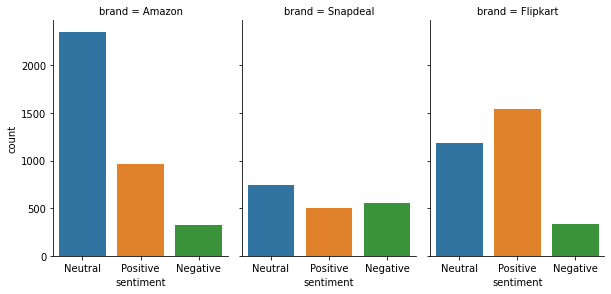

In [57]:
g = sns.catplot(x='sentiment', col='brand',data=tweets, kind='count',height=4, aspect=.7)

**Flipkart** has the has the most **Positive** sentiment and the least **Negetive** sentiment
<br>
On the other hand, **Snapdeal** has the has the least **Positive** sentiment and the most **Negetive** sentiment

In [58]:
from wordcloud import WordCloud

# WordCloud

## Amazon

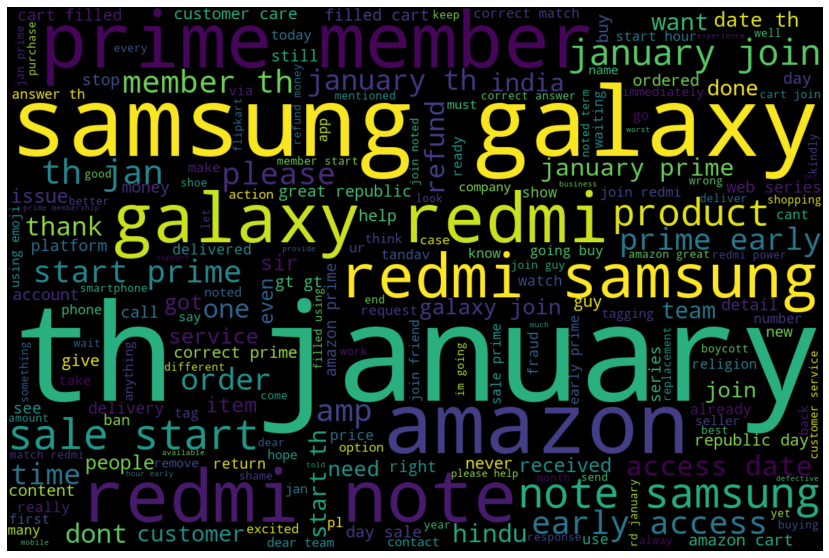

In [59]:
allWords = ' '.join([twts for twts in tweets['lemmatized_text'][tweets['brand']=='Amazon']])
wc = WordCloud(width=1200, height = 800, random_state = 21, max_font_size=200).generate(allWords)
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Most customers seem to be talking about the Samsung Galaxy, Redmi note & Amazon Prime

## Flipkart

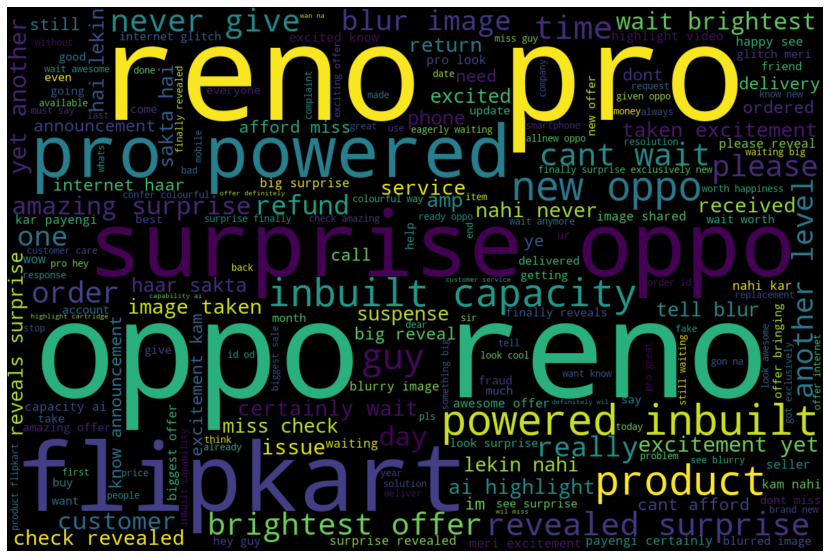

In [60]:
allWords = ' '.join([twts for twts in tweets['lemmatized_text'][tweets['brand']=='Flipkart']])
wc = WordCloud(width=1200, height = 800, random_state = 21, max_font_size=200).generate(allWords)
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Most customers seem to be talking about the Oppo Reno
<br>
Words like excitement, surprise, etc. are mentioned which would elicit positive sentiment

## Snapdeal

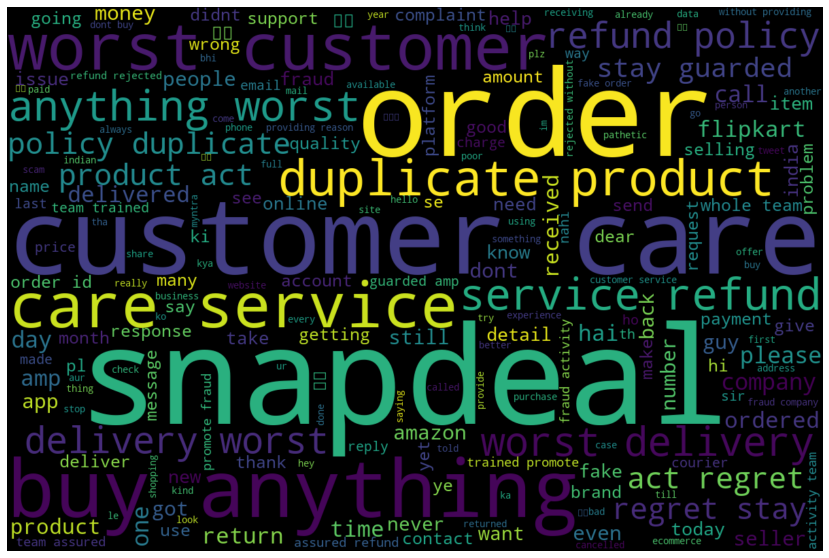

In [61]:
allWords = ' '.join([twts for twts in tweets['lemmatized_text'][tweets['brand']=='Snapdeal']])
wc = WordCloud(width=1200, height = 800, random_state = 21, max_font_size=200).generate(allWords)
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Most customer are using words like refund, duplicate, worst, regret,  etc. are mentioned which elicit negative sentiment.